In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
addpath = "./input/"
df = pd.read_csv(addpath + "train.csv")
df_test = pd.read_csv(addpath + "test.csv")

#For filling NaN value, cancatenate the data above.
data = pd.concat([df, df_test], sort=False)

In [3]:
print(df.shape)
df.head()

(1280, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5
3,8.6,0.47,0.27,1.9,0.058,17.5,37.6,0.9907,3.16,0.85,11.1,6.1
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6


In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1280.00000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.34125,0.527187,0.271383,2.549766,0.087614,15.599844,45.652812,0.996999,3.309405,0.658953,10.427813,5.614297
std,1.74115,0.181153,0.194353,1.452651,0.049233,10.482150,32.914044,0.009760,0.149534,0.175200,1.065322,0.987628
min,4.70000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.951600,2.720000,0.330000,8.400000,2.500000
25%,7.10000,0.390000,0.100000,1.900000,0.070000,7.000000,21.675000,0.991000,3.220000,0.550000,9.500000,4.900000
50%,8.00000,0.520000,0.260000,2.200000,0.079000,13.100000,36.800000,0.996805,3.309405,0.620000,10.200000,5.500000
75%,9.30000,0.640000,0.430000,2.600000,0.090250,20.925000,60.350000,1.002600,3.390000,0.730000,11.100000,6.300000
max,15.90000,1.610000,1.000000,15.500000,0.615000,71.800000,290.300000,1.029000,3.970000,2.050000,15.000000,9.700000


In [4]:
df.isnull().sum()
data.isnull().sum()
# df.isnull().any()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 147
pH                      161
sulphates                 0
alcohol                   0
quality                 319
dtype: int64

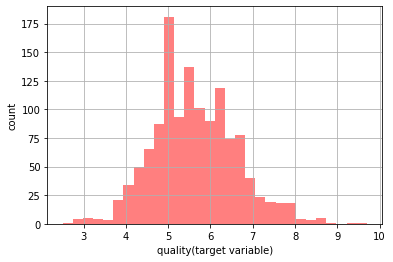

In [5]:
df["quality"].hist(figsize=(6,4),bins=30,alpha=0.5, color="red")
plt.xlabel("quality(target variable)")
plt.ylabel("count")
plt.show()

In [6]:
quality = df["quality"].values
category = []

for num in quality:
    if num < 5:
        category.append("Bad")
    elif num > 6:
        category.append("Good")
    else:
        category.append("Mid")

len(category)

1280

In [7]:
cat = pd.DataFrame(data=category, columns=["category"])
df2 = pd.concat([df, cat], axis=1)

Mid     540
Good    404
Bad     336
Name: category, dtype: int64

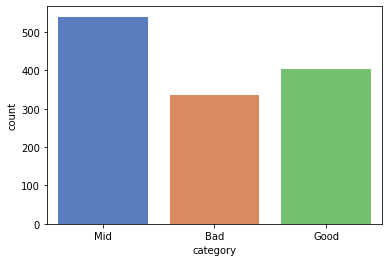

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(df2["category"], palette="muted")
df2["category"].value_counts()

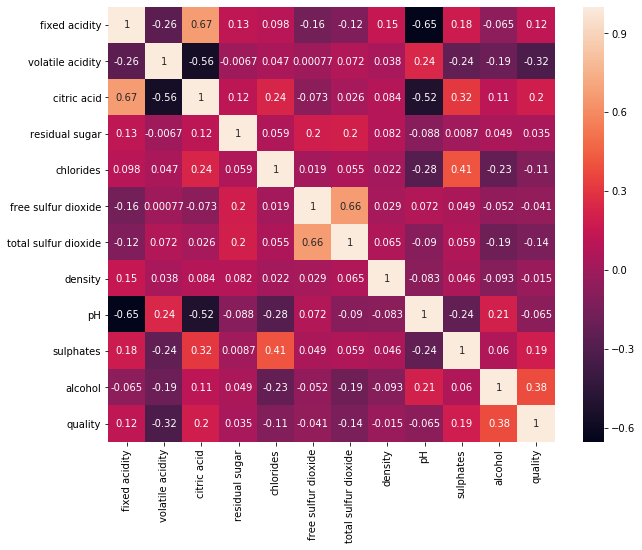

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

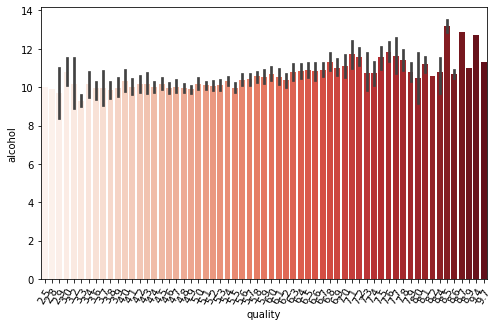

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df2["quality"], y=df["alcohol"], palette="Reds")
plt.xticks(rotation=60)

<Figure size 576x432 with 0 Axes>

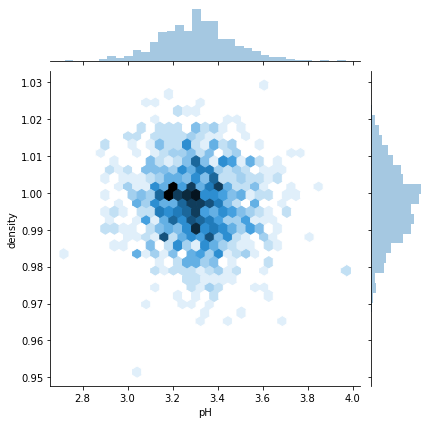

In [11]:
plt.figure(figsize=(8,6))
sns.jointplot(x=df["pH"], y=df["density"], kind="hex")
plt.show()

<Figure size 576x432 with 0 Axes>

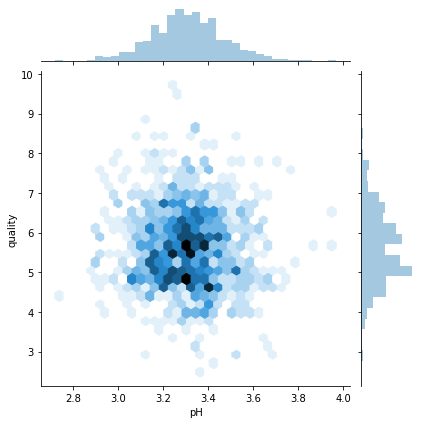

In [12]:
plt.figure(figsize=(8,6))
sns.jointplot(x=df["pH"], y=df["quality"], kind="hex")
plt.show()

In [13]:
print("median of pH:", np.median(data["pH"]))
print("mean of pH:", np.mean(data["pH"]))

median of pH: nan
mean of pH: 3.3120862308762153
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


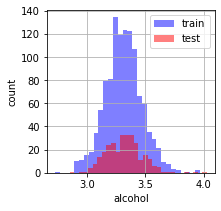

In [14]:
df["pH"].hist(figsize=(3, 3), bins=30, alpha=0.5, color="blue", label="train")
df_test["pH"].hist(figsize=(3, 3), bins=30, alpha=0.5, color="red", label="test")
plt.ylabel("count")
plt.xlabel("alcohol")
plt.legend(loc="best")
plt.show()

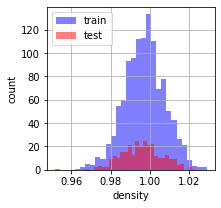

In [15]:
df["density"].hist(figsize=(3, 3), bins=30, alpha=0.5, color="blue", label="train")
df_test["density"].hist(figsize=(3, 3), bins=30, alpha=0.5, color="red", label="test")
plt.ylabel("count")
plt.xlabel("density")
plt.legend(loc="best")
plt.show()

In [16]:
df["density"].fillna(np.mean(data["density"]), inplace=True)
df["pH"].fillna(np.mean(df["pH"]), inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 12 columns):
fixed acidity           1280 non-null float64
volatile acidity        1280 non-null float64
citric acid             1280 non-null float64
residual sugar          1280 non-null float64
chlorides               1280 non-null float64
free sulfur dioxide     1280 non-null float64
total sulfur dioxide    1280 non-null float64
density                 1280 non-null float64
pH                      1280 non-null float64
sulphates               1280 non-null float64
alcohol                 1280 non-null float64
quality                 1280 non-null float64
dtypes: float64(12)
memory usage: 120.1 KB


In [18]:
X = df.drop("quality", axis=1)
# X = df.iloc[:, :11]
y = df["quality"].values.astype("int")
y = df["quality"].values
X_test = df_test

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_valid.shape)
# print(y_train)
print(X_test.shape)

(384, 11)
(319, 11)


In [20]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_valid = sc_X.fit_transform(X_valid)
# X_test = sc_X.fit_transform(X_test)


In [21]:
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)

ValueError: Unknown label type: 'continuous'

In [0]:
from sklearn.metrics import accuracy_score, classification_report

In [0]:
accuracy_score(y_valid, knn_pred)

In [0]:
print(classification_report(y_valid, knn_pred))

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_valid)

In [0]:
accuracy_score(y_valid, pred_svc)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_dict = {"n_estimators": [100, 200, 400],
                "max_features": ["auto", "sqrt", "log2"]}
clf_rf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), param_grid=params_dict, scoring="accuracy", cv=10)
clf_rf.fit(X_train, y_train)

In [0]:
clf_rf.best_score_

In [0]:
clf_rf.best_params_

In [0]:
pred = clf_rf.predict(X_valid)
accuracy_score(pred, y_valid)